In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

In [4]:
save_files = 'files/Section8-Final-predictions'

In [5]:
save_img = 'docs/img/Section8-Final-predictions'

In [6]:
session_name = 'Section8-Final-predictions'

# Section VIII. Final predictions

## Load Saved Section if exists

## Load Data

In [7]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
datasets_dict_raw = loadit(
    'datasets_dict', dir='Section1-Overview-and-Base-model')
features_dict = loadit(
    'features_dict', dir='Section4-Linear-models-research')
groups_dict = loadit(
    'groups_dict', dir='Section2-Explore-and-Clean')
transform_dict = loadit(
    'transform_dict', dir='Section3-Feature-selection-and-Preprocessing')
simulation_datasets_dict = loadit(
    'simulation_datasets_dict', dir='Section7-ML-models')
estimators_dict = loadit(
    'estimators_dict', dir='Section7-ML-models')
evaluation_dict = loadit(
    'evaluation_dict', dir='Section7-ML-models')

# test dataset
test = datasets_dict['test']

# target variable
target='price'

# overview transformers
transformer_overview = transform_dict['transformer_overview']
transformer_imputer_median = transform_dict['transformer_imputer_median']
transformer_imputer_frequent = transform_dict['transformer_imputer_frequent']
transformer_label = transform_dict['transformer_label']

# feature selection transformers
transformer_features_creator = transform_dict['transformer_features_creator']
transformer_features_logger = transform_dict['transformer_features_logger']

# preprocessing transformers
encoder = transform_dict['encoder']
scaler = transform_dict['scaler']

# additional features lists
features_na = transform_dict['features_na']
features_log = transform_dict['features_log']

# models
lgb_base = estimators_dict['lgb_base']
lgb_clean = estimators_dict['lgb_iter1']
lgb_nf = estimators_dict['lgb_iter2']
enet = estimators_dict['enet']
stack = estimators_dict['stack_ml']
svr = estimators_dict['svr_ml']
hpp = estimators_dict['hpp']

## Tests Datasets for Sections

In [8]:
test.shape

(146, 81)

In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


### Log Target Variable

In [10]:
test['price'] = np.log(test['price'])

In [11]:
y_test = test['price'].copy()

### Overview Transformation and Discrepancy Check

#### Transformation

In [12]:
test = transformer_overview.transform(test)

#### Discrepancy

##### Garage Discrepancy

In [13]:
features_garage = groups_dict['features_garage']

In [14]:
check_garage_discrepancy(test, features_garage)

Garage Features NA-zeroes length: No discrepancy
Garage Features NA-zeroes: No discrepancy


##### Basement Discrepancy

In [15]:
features_bsmt = groups_dict['features_bsmt']

In [16]:
check_bsmt_discrepancy(test, features_bsmt)

Basement Features: No discrepancy


##### Square Feet Features

In [17]:
features_square = groups_dict['features_square'].copy()

In [18]:
square_feet_check_discrepancy(test, features_square)

Livarea Features: No discrepancy
Masvnrtype Features: No discrepancy
Pool Features NA-zeroes: No discrepancy


##### Year Features

In [19]:
features_year = groups_dict['features_year']

In [20]:
year_check_discrepancy(test, features_year)

Year Features: No discrepancy


### Dataset Base (Section I)

#### Transformation Pipeline

In [21]:
pipeline_s1 = Pipeline(steps=[
    ('transformer_imputer_num', transformer_imputer_median),
    ('transformer_imputer_cat', transformer_imputer_frequent),
    ('transformer_label', transformer_label),
    ('encoder', encoder)
])

#### Transform Test Dataset

In [22]:
test_s1 = pipeline_s1.transform(test)

In [23]:
test_s1.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
892,893,10,3,70.0,8414,1,2,0,1,1,...,0,0,2,2,0,2,2006,5,4,11.947949
1105,1106,14,3,98.0,12256,1,2,1,1,1,...,0,0,3,2,0,4,2010,5,4,12.691580
413,414,0,1,56.0,8960,1,0,0,1,1,...,0,0,3,2,0,3,2010,5,4,11.652687


### Dataset after Cleaning with Original Features (Section II)

#### Transformation Pipeline

In [24]:
pipeline_s2 = Pipeline(steps=[
    ('transformer_imputer_num', transformer_imputer_median),
    ('transformer_imputer_cat', transformer_imputer_frequent),
    ('transformer_label', transformer_label),
    ('encoder', encoder)
])

#### Transform Test Dataset

In [25]:
test_s2 = pipeline_s2.transform(test)

In [26]:
test_s2.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,price
892,893,10,3,70.0,8414,1,2,0,1,1,...,0,0,2,2,0,2,2006,5,4,11.947949
1105,1106,14,3,98.0,12256,1,2,1,1,1,...,0,0,3,2,0,4,2010,5,4,12.691580
413,414,0,1,56.0,8960,1,0,0,1,1,...,0,0,3,2,0,3,2010,5,4,11.652687


### Dataset with added New Features and no log-transform (Section III)

#### Transformation Pipeline

In [27]:
pipeline_s3 = Pipeline(steps=[
    ('transformer_numeric', transformer_imputer_median),
    ('transformer_categorical', transformer_imputer_frequent),
    ('transformer_label', transformer_label),
    ('transformer_create', transformer_features_creator),
    ('transformer_logarithm', transformer_features_logger),
    ('encoder', encoder)
])

#### Transform Test Dataset

In [28]:
test_s3 = pipeline_s3.transform(test)

In [29]:
test_s3 = order_X_y(test_s3, 'price')

In [30]:
test_s3.head(3)

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
892,893,10,3,4.262680,9.037771,1,2,0,1,1,...,0,0,0,0,0,0,3,43,43.0,11.947949
1105,1106,14,3,4.595120,9.413852,1,2,1,1,1,...,1,0,0,0,0,0,15,16,16.0,12.691580
413,414,0,1,4.043051,9.100637,1,0,0,1,1,...,0,1,0,0,0,0,60,83,83.0,11.652687


### Dataset with added New Features and no log-transform (Section IV, VI, VII)

#### Transformation Pipeline

In [31]:
pipeline_s467 = Pipeline(steps=[
    ('transformer_overview', transformer_overview),
    ('transformer_numeric', transformer_imputer_median),
    ('transformer_categorical', transformer_imputer_frequent),
    ('transformer_label', transformer_label),
    ('transformer_create', transformer_features_creator),
    ('transformer_logarithm', transformer_features_logger),
    ('encoder', encoder),
    ('scaler', scaler)
   
])

#### Transform Test Dataset

In [32]:
test_s467 = pipeline_s467.transform(test)

In [33]:
test_s467 = order_X_y(test_s467, 'price')

In [34]:
test_s467.head(3)

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
892,893,0.207206,0.351287,0.175836,-0.142503,0.061875,0.251891,-0.657047,-0.109613,0.027629,...,-1.117459,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.969513,0.201367,0.438312,11.947949
1105,1106,1.249997,0.351287,1.253072,0.583542,0.061875,0.251891,0.856818,-0.109613,0.027629,...,0.894888,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.389332,-0.683962,-0.580865,12.691580
413,414,-2.399772,-2.186110,-0.535848,-0.021137,0.061875,-4.640394,-0.657047,-0.109613,0.027629,...,-1.117459,2.459347,-0.133631,-0.296592,-0.067806,-0.194948,1.786346,1.512964,1.948204,11.652687


## Features for Sections

In [35]:
features_base = simulation_datasets_dict['features_base']
features_orig = simulation_datasets_dict['features_iter1']
features_new = simulation_datasets_dict['features_iter2']
features_enet = simulation_datasets_dict['features_enet']
features_svr = simulation_datasets_dict['features_ml_svr']
features_stack = simulation_datasets_dict['features_ml_stack']
features_hpp = simulation_datasets_dict['features_hpp']

In [36]:
# for base and orig estimator will use features orig as it equals
set(features_base) == set(features_orig)

True

In [37]:
# for hhp wil use featurs new
set(features_new) == set(features_hpp)

True

In [38]:
# features for LR estimator
print(features_enet)

['lg_flrsfmean', 'overallqual', 'houseage', 'lg_lotarea', 'overallcond', 'bsmtqual', 'garagecars', 'kitchenqual', 'exterqual']


In [39]:
features_s1 = features_base.copy()

In [40]:
features_s2 = features_base.copy()

In [41]:
features_s3 = features_new.copy()

In [42]:
features_s4 = features_enet.copy()

In [43]:
features_s67 = features_new.copy()

## Check if Estimators are fitted

In [44]:
estimators_check_list = [
    lgb_base, lgb_clean, lgb_nf, svr, stack, hpp
]

In [45]:
check_fit(
    names_list=['LGB Base', 'LGB Orig', 'LGB New', 'SVR', 'Stacking', 'HPP'],
    estimators_list=estimators_check_list
)

All estimators fitted


## Predictions on Test Dataset

In [46]:
estimators_names = [
    'Base', 'Base (Clean)', 'Base (FE)',
    'Elastic Net', 'SVM', 'Stacking', 'HPP'
]

In [47]:
estimators_list = [
    lgb_base, lgb_clean, lgb_nf,
    enet, svr, stack, hpp
]

In [48]:
datasets_list = [
    test_s1, test_s2, test_s3,
    test_s467, test_s467, test_s467, test_s467
]

In [49]:
features_list = [
    features_s1, features_s2, features_s3,
    features_s4, features_svr, features_stack, features_s67
]

In [50]:
zip_ = zip(
    estimators_names, estimators_list, datasets_list, features_list)

In [51]:
scores_test_price_dict = {}
scores_test_mean_dict = {}
for name_, estimator_, data_, features_ in zip_:
    y_pred_ = estimator_.predict(data_[features_])
    scores_test_price_dict[name_] = y_pred_
    rmse_ = mean_squared_error(y_test, y_pred_, squared=False)
    scores_test_mean_dict[name_] = rmse_

In [52]:
scores_test_price = pd.DataFrame(scores_test_price_dict)

In [53]:
scores_test_mean = pd.DataFrame(scores_test_mean_dict, index=[0])

In [54]:
scores_test_mean = scores_test_mean.T.rename(columns={0: 'rmse_mean_test'})

## CV results from previous Sections

In [55]:
cv_base = evaluation_dict['cv_base']
cv_clean = evaluation_dict['cv_iter1']
cv_nf = evaluation_dict['cv_iter2']
cv_enet = evaluation_dict['cv_enet']
cv_svr = evaluation_dict['cv_svr_ml']
cv_stack = evaluation_dict['cv_stack_ml']
cv_hpp = evaluation_dict['cv_hpp']

In [56]:
cv_list = [
    cv_base, cv_clean, cv_nf,
    cv_enet, cv_svr
]

In [57]:
cv_list2 = [
    cv_stack, cv_hpp
]

In [58]:
estimators_names

['Base', 'Base (Clean)', 'Base (FE)', 'Elastic Net', 'SVM', 'Stacking', 'HPP']

In [59]:
scores_cv_mean_dict = {}
scores_cv_folds = pd.DataFrame(columns=estimators_names[:-2])
for name_, cv_ in zip(estimators_names[:-2], cv_list):
    cv_df_ = pd.DataFrame(cv_.cv_results_).sort_values('rank_test_score')
    scores_df_ = cv_df_.filter(regex=r"split\d*_test_score").iloc[0].T
    scores_cv_folds[name_] = scores_df_
    rmse_ = cv_df_['mean_test_score'].iloc[0]
    rmse_std_ = cv_df_['std_test_score'].iloc[0]
    fit_time_ = cv_df_['mean_fit_time'].iloc[0]
    fit_time_std_ = cv_df_['std_fit_time'].iloc[0]
    scores_cv_mean_dict[name_] = [
        rmse_, rmse_std_, fit_time_, fit_time_std_
    ]

In [60]:
scores_cv_mean = pd.DataFrame(
    data=scores_cv_mean_dict,
    index=[
        'rmse_mean_cv', 'rmse_std',
        'fit_time', 'fit_time_std'
]).T

In [61]:
for name_, cv_ in zip(estimators_names[-2:], cv_list2):

    scores_cv_folds[name_] = cv_['test_score']
    
    rmse_mean_ = cv_['test_score'].mean()
    rmse_std_ = cv_['test_score'].std(ddof=1)
    fit_time_ = cv_['fit_time'].mean()
    fit_time_std_ = cv_['fit_time'].std(ddof=1)
    row = [rmse_mean_, rmse_std_, fit_time_, fit_time_std_]
    scores_cv_mean.loc[len(scores_cv_mean), scores_cv_mean.columns] = row

In [62]:
scores_cv_mean.index = estimators_names
# change minus in HPP results to plus
scores_cv_mean.loc['HPP', 'rmse_mean_cv'] = \
    -scores_cv_mean.loc['HPP', 'rmse_mean_cv']

scores_cv_mean = scores_cv_mean.sort_values('rmse_mean_cv', ascending=False)

# change minus in HPP results to plus
scores_cv_folds['HPP'] = -scores_cv_folds['HPP']
scores_cv_folds.index = \
    [re.sub(r'([split, _test_score])', '', i) for i in scores_cv_folds.index]

In [63]:
scores_mean = scores_test_mean.join(scores_cv_mean)
scores_mean['rmse_mean_test'] = -scores_mean['rmse_mean_test']

In [64]:
scores_cv_ci = pd.DataFrame(
    data=ci_bootstrap(scores_cv_folds),
    index=estimators_names
)
scores_mean['proxi_margin'] = scores_cv_ci['proxi_margin']

## Visualization

In [65]:
scores_mean

,rmse_mean_test,rmse_mean_cv,rmse_std,fit_time,fit_time_std,proxi_margin
Base,-0.121691,-0.127615,0.025785,0.180082,0.005066,0.011480
Base (Clean),-0.111065,-0.123350,0.022412,0.141219,0.010036,0.009838
Base (FE),-0.119309,-0.122990,0.025051,0.165539,0.009644,0.011204
Elastic Net,-0.122982,-0.133691,0.026082,0.011573,0.002021,0.011663
SVM,-0.105972,-0.114657,0.019492,0.607232,0.091940,0.008624
Stacking,-0.102685,-0.111476,0.021145,43.934728,2.529728,0.009084
HPP,-0.097006,-0.110070,0.022490,76.327743,3.864638,0.009762


In [66]:
scores_cv_folds.head()

,Base,Base (Clean),Base (FE),Elastic Net,SVM,Stacking,HPP
0,-0.164297,-0.157211,-0.165730,-0.185009,-0.147900,-0.147111,-0.152636
1,-0.124559,-0.116307,-0.122431,-0.149690,-0.126961,-0.117125,-0.126294
2,-0.115516,-0.111120,-0.108931,-0.117060,-0.113427,-0.108163,-0.104814
3,-0.087887,-0.073590,-0.081623,-0.103142,-0.095110,-0.074047,-0.078293
4,-0.150361,-0.143345,-0.145733,-0.159411,-0.134562,-0.131761,-0.132686


In [67]:
# xticks params
xtickslabels = list(scores_mean.index)
xticks = np.arange(0, len(xtickslabels))
xticks_delta = 0.1
xticks_cv = xticks
xticks_test = xticks + xticks_delta
# xaxis limits params
xlim_delta = 0.35
xlim_min = 0 - xlim_delta
xlim_max = len(xtickslabels) - 1 + xlim_delta
# erros for errorbars
pi_error = 2*scores_mean['rmse_std']
ci_error = scores_mean['proxi_margin']
# color 
plot_palette = [palette[0]]*(len(scores_mean.index))
lgd_alpha = 1 

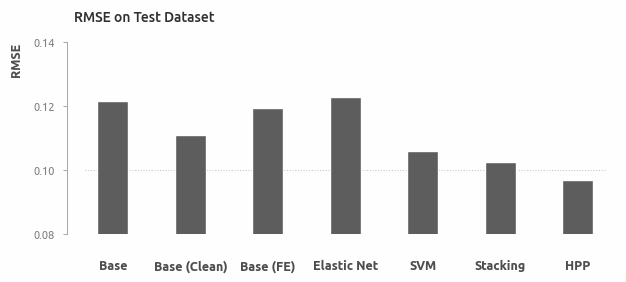

Image 'final_bar.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [68]:
fig = plt.figure(figsize=(7, 2.5))
sns.barplot(
    x=xticks,
    y=-scores_mean['rmse_mean_test'],
    width=0.4,
    errorbar=('ci', 95),
    err_kws={'color': palette[-1]},
    color=palette[0],
    zorder=10
)
plt.xlim(-0.5, 6.5)
plt.ylim(0.089, 0.131)
plt.yticks(np.arange(0.090, 0.1301, 0.01))
plt.ylabel('RMSE')
plt.title('RMSE on Test Dataset')
plt.axhline(
    y=0.100, xmin=0.02, xmax=0.98,
    lw=0.75, linestyle=':', color=palette[-2], zorder=1)
# plt.grid(False)

# plt.tick_params(bottom=False, left=False)
axis_rstyle(yticks=[0.08, 0.14, 0.02], grid=False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='x', bottom=False, pad=5)
plt.xticks(
    ticks=xticks, labels=xtickslabels,
    weight='bold', fontsize=9, color='0.3')

plt.show()

savefig('final_bar', save_img)

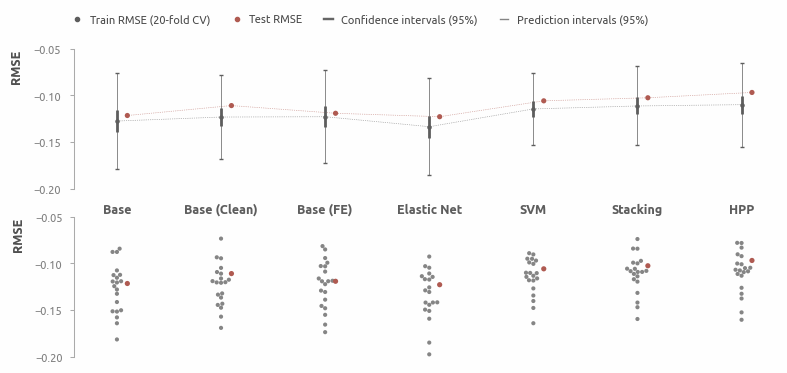

Image 'final_plot.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [69]:
fig, ax = plt.subplots(2, 1, figsize=(9, 4), height_ratios=[1, 1])

# ax 0
# scatterplots
ax[0].scatter(
    x=xticks_cv, y=scores_mean['rmse_mean_cv'], s=5, ec='face', color=palette[0])
ax[0].scatter(
    x=xticks_test, y=scores_mean['rmse_mean_test'], s=14, ec='none', color=palette[1])
# connection lines
ax[0].plot(
    xticks_cv, scores_mean['rmse_mean_cv'],
    lw=0.5, ls=':', color=palette[0], alpha=0.75)
ax[0].plot(
    xticks_test, scores_mean['rmse_mean_test'],
    lw=0.5, ls=':', color=palette[1], alpha=0.75)
# pi intervals
ax[0].errorbar(
    x=xticks_cv, y=scores_mean['rmse_mean_cv'], yerr=pi_error,
    linestyle='none', capsize=1.5, lw=0.5, color=palette[0], alpha=1)
# ci intervals
ax[0].errorbar(
        x=xticks_cv, y=scores_mean['rmse_mean_cv'], yerr=ci_error,
        linestyle='none', capsize=0, lw=2, color=palette[0])

axis_rstyle(
    yticks=[-0.200, -0.050, 0.05],
    ylim=[-0.20, -0.05],
    ax=ax[0])
ax[0].spines['bottom'].set_visible(False)

# labels and title
ax[0].set_xlabel(None)
# ax[0].set_title('Train and Test RMSE', pad=25)
ax[0].set_ylabel('RMSE')
# axes limits
ax[0].set_xlim(xlim_min, xlim_max)

# ticks (models names)
ax[0].set_xticks(
    ticks=xticks, labels=xtickslabels, weight='bold',
    fontsize=9)
# models names color
ax[0].tick_params(axis='x', bottom=False, labelcolor=palette[0], pad=-3)
# grid
ax[0].grid(False)
# baseline
# ax[0].axhline(
#     scores_cv_folds['Base'].mean(), 0.025, 0.975, lw=0.5, ls=':',
#     color=palette[0])

# legend handles
handle_cv = Line2D(
    [], [], label='Train RMSE (20-fold CV)', marker='o',
    markersize=3, color=palette[0], linestyle='None', alpha=lgd_alpha)
handle_test = Line2D(
    [], [], label='Test RMSE', marker='o',
    markersize=3, color=palette[1], linestyle='None', alpha=lgd_alpha)
handle_pi = Line2D(
    [], [], label='Prediction intervals (95%)', lw=1,
    color=palette[0], alpha=0.75)
handle_ci = Line2D(
    [], [], label='Confidence intervals (95%)', lw=1.75,
    color=palette[0], alpha=0.95)
# legend
ax[0].legend(
    handles=[handle_cv, handle_test, handle_ci, handle_pi],
    ncols=5, fontsize=8, alignment='left', markerscale=1,
    handletextpad=0.75, handlelength=0.75,
    bbox_to_anchor=(-0.025, 1.1), loc='lower left', frameon=False)

# ax 1
ax[1].scatter(
    x=xticks_test, y=scores_mean['rmse_mean_test'], 
    s=14, ec='none', lw=0.5, color=palette[1], zorder=5)
sns.swarmplot(
    scores_cv_folds, size=3, palette=palette[:1]*7,
    zorder=1, alpha=0.75, ax=ax[1])

axis_rstyle(
    yticks=[-0.200, -0.050, 0.050],
    ylim=[-0.20, -0.05],
    ax=ax[1])
ax[1].spines['bottom'].set_visible(False)

# move xticks to top
ax[1].tick_params(
    top=False, labeltop=False, bottom=False,
    labelbottom=False, pad=5)
# ylabel
ax[1].set_ylabel('RMSE')
# axes limits
ax[1].set_xlim(xlim_min, xlim_max)
# grid
ax[1].grid(False)
# baseline
# ax[1].axhline(
#     scores_cv_folds['Base'].mean(), 0.025, 0.975, lw=0.5, ls=':',
#     color=palette[0])

# subplots adjust
plt.subplots_adjust(hspace=0.2)
plt.show()

savefig('final_plot', save_img, dpi=100, transparent=True)

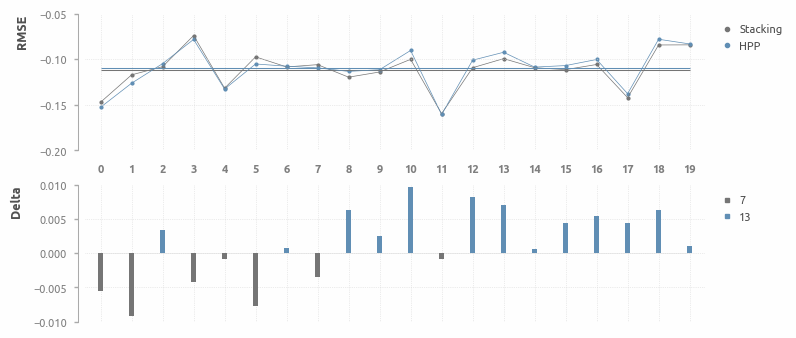

Image 'stack_hpp_compare.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [70]:
fig = plot_estimators_comparing(
    data=scores_cv_folds[['Stacking', 'HPP']],
    labels=['Stacking', 'HPP'],
    ylabels=['RMSE', 'Delta'],
    kind='bar',
    figsize=(8, 4),
    width=0.15,
    palette=[alpha_color(palette[0], 0.85), palette[2]],
    ax0_y_ticks=[-0.20, -0.05, 0.05],
    ax1_y_ticks=[-0.010, 0.010, 0.005],
    grid=True
)
savefig('stack_hpp_compare', save_img)

## Comparing Predicted and Actual values

In [71]:
data_pred_actual = \
    test_s1.join(scores_test_price_dict['HPP'].to_frame())

In [72]:
data_pred_actual = \
    data_pred_actual.rename(columns={'price': 'actual_log', 0: 'predicted_log'})

In [73]:
data_pred_actual[['actual', 'predicted']] = \
    data_pred_actual[['actual_log', 'predicted_log']].apply(np.exp)

In [74]:
data_pred_actual['predicted'] = data_pred_actual['predicted'].round()

In [75]:
data_pred_actual['residual'] = \
    data_pred_actual['actual'] - data_pred_actual['predicted']
data_pred_actual['residual_log'] = \
    data_pred_actual['actual_log'] - data_pred_actual['predicted_log']

In [76]:
data_pred_actual['residual_frac'] = data_pred_actual['residual'] / data_pred_actual['actual']

In [77]:
data_pred_actual.shape

(146, 87)

In [78]:
data_pred_actual.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,yrsold,saletype,salecondition,actual_log,predicted_log,actual,predicted,residual,residual_log,residual_frac
892,893,10,3,70.0,8414,1,2,0,1,1,...,2006,5,4,11.947949,11.905037,154500.0,148010.0,6490.0,0.042913,0.042006
1105,1106,14,3,98.0,12256,1,2,1,1,1,...,2010,5,4,12.691580,12.702375,325000.0,328527.0,-3527.0,-0.010795,-0.010852
413,414,0,1,56.0,8960,1,0,0,1,1,...,2010,5,4,11.652687,11.590675,115000.0,108085.0,6915.0,0.062012,0.060130
522,523,5,1,50.0,5000,1,2,0,1,1,...,2006,5,4,11.976659,11.957282,159000.0,155949.0,3051.0,0.019377,0.019189
1036,1037,10,3,89.0,12898,1,2,1,3,1,...,2009,5,4,12.661914,12.744962,315500.0,342820.0,-27320.0,-0.083048,-0.086593


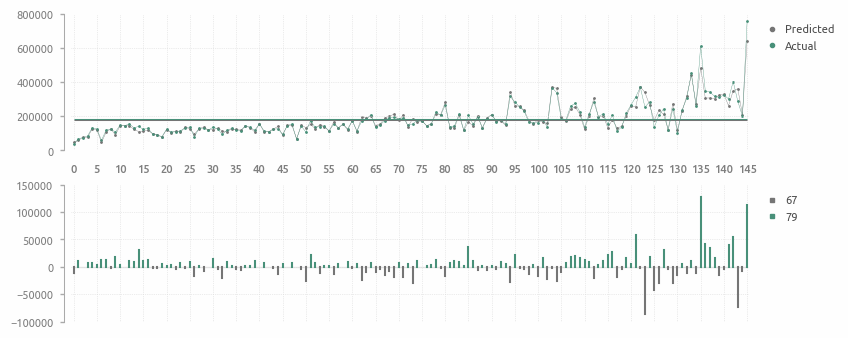

Image 'predicted_actual_residuals.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [79]:
fig = plot_estimators_comparing(
    data=data_pred_actual.sort_values('grlivarea')[['predicted', 'actual']],
    labels=['Predicted', 'Actual'],
    kind='line',
    figsize=(8.75, 4),
    markersize=1,
    linewidth=0.25,
    palette=[alpha_color(palette[0], 0.85), palette[3]],
    ax0_y_ticks=[0, 800000, 200000],
    ax1_y_ticks=[-100000, 150000, 50000],
    x_ticks_weight='medium',
    ticks_step=5
)

savefig('predicted_actual_residuals', save_img)

#### Residuals

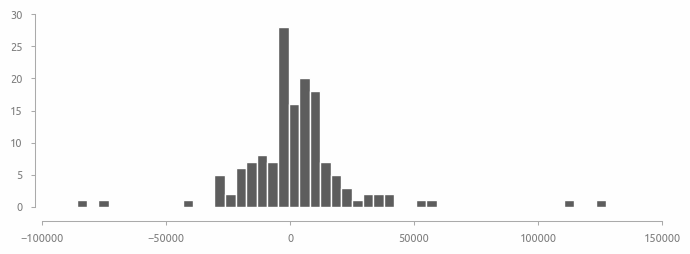

Image 'hpp_residuals.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [80]:
fig, ax = plt.subplots(figsize=(8, 2.5))
ax.hist(x=data_pred_actual['residual'], bins=50)
ax.grid(False)
axis_rstyle(xticks=(-100000, 150000, 50000), yticks=(0, 30, 5))
plt.show()

savefig('hpp_residuals', save_img)

In [81]:
test_normality(data_pred_actual['residual'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),6.2144,Not normal
2,Shapiro-Wilk,0.0000,Not normal
3,Jarque-Bera,0.0000,Not normal
4,D’Agostino-Pearson,0.0000,Not normal


In [82]:
cond1 = (data_pred_actual['residual'] > -50000)
cond2 = (data_pred_actual['residual'] < 50000)

In [83]:
columns_for_cutted = [
    'id', 'actual_log', 'predicted_log', 'actual', 'predicted', 'residual'
]
data_pred_actual.loc[~(cond1 & cond2), columns_for_cutted]

,id,actual_log,predicted_log,actual,predicted,residual
218,219,12.649155,12.443084,311500.0,253491.0,58009.0
581,582,12.442302,12.734612,253293.0,339290.0,-85997.0
1024,1025,12.567237,12.795505,287000.0,360593.0,-73593.0
898,899,13.323927,13.090221,611657.0,484184.0,127473.0
691,692,13.534473,13.371493,755000.0,641454.0,113546.0
231,232,12.906692,12.763632,403000.0,349281.0,53719.0


In [84]:
# data with residuals less than 50000 and more than -50000
data_pred_actual_cutted = data_pred_actual.loc[(cond1 & cond2), :].copy()
data_pred_actual_cutted = data_pred_actual_cutted.rename(columns={'residual': 'residual cutted'})

In [85]:
test_normality(data_pred_actual_cutted['residual cutted'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),0.9399,Not normal
2,Shapiro-Wilk,0.0651,Normal
3,Jarque-Bera,0.2119,Normal
4,D’Agostino-Pearson,0.2288,Normal


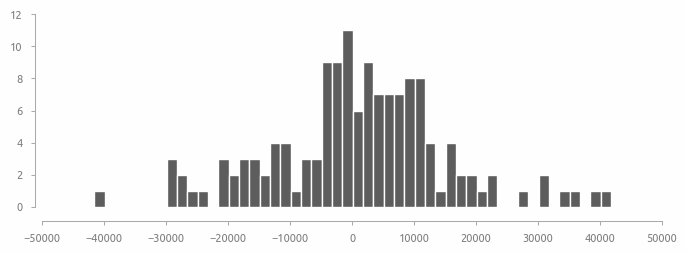

In [86]:
f = plt.figure(figsize=(8, 2.5))
plt.hist(x=data_pred_actual_cutted['residual cutted'], bins=50)
axis_rstyle(xticks=(-50000, 50000, 10000), yticks=(0, 12, 2))
plt.grid(False)
plt.show()

In [87]:
normal_dist = np.random.normal(
    loc=0, scale=data_pred_actual_cutted['residual cutted'].std(ddof=1), size=140)

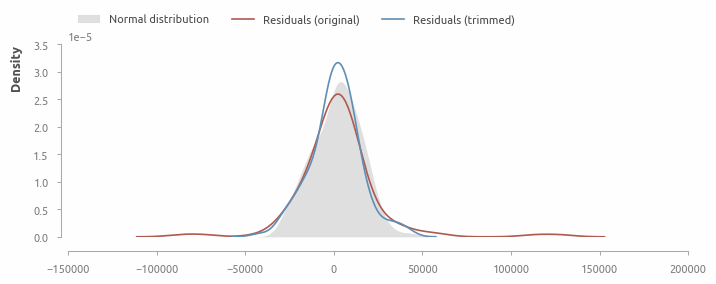

Image 'residuals_distributions_compare.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [88]:
fig = plt.figure(figsize=(8, 2.5))

sns.kdeplot(
    normal_dist, lw=0.01, fill=True, color=alpha_color(palette[0], 0.75),
    label='Normal distribution')
sns.kdeplot(
    data_pred_actual['residual'], color=palette[1],
    label='Residuals (original)')
sns.kdeplot(
    data_pred_actual_cutted['residual cutted'], color=palette[2],
    label='Residuals (trimmed)')

plt.legend(loc='lower left', bbox_to_anchor=(0, 1.05), frameon=False, ncols=3)
# plt.title(
#     'Comparison of Residual distributions with and without outliers',
#     loc='left', pad=32)
axis_rstyle(
    xticks=(-150000, 200000, 50000), yticks=(0, 3.5*10**-5, 0.5*10**-5))
plt.grid(False)
plt.xlabel(None)
plt.show()

savefig('residuals_distributions_compare', save_img)

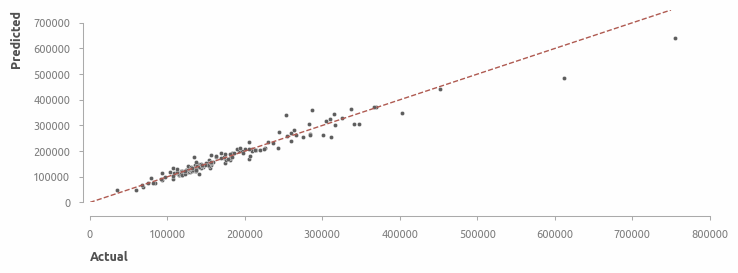

Image 'actual_predicted.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [89]:
fig = plt.figure(figsize=(8, 2.5))

sns.scatterplot(
    data=data_pred_actual.sort_values('actual'),
    x=data_pred_actual['actual'],
    y=data_pred_actual['predicted']
)

plt.axline([0, 0], [1, 1], lw=1, ls='--', color=palette[1])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(left=0)
plt.ylim(bottom=0, top=750000)
plt.grid(False)
axis_rstyle(
    xticks=[0, 800000, 100000],
    yticks=[0, 700000, 100000])
plt.show()

savefig('actual_predicted', save_img)

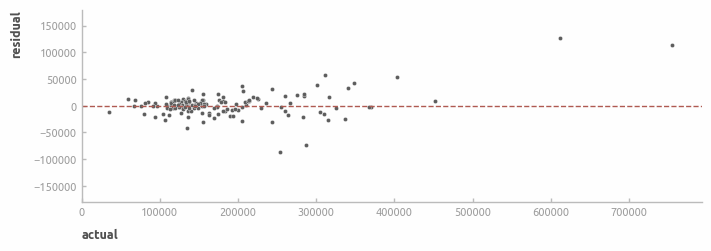

In [90]:
f = plt.figure(figsize=(8, 2.5))

sns.scatterplot(
    data=data_pred_actual.sort_values('actual'),
    x=data_pred_actual['actual'],
    y=data_pred_actual['residual']
)
plt.axline([0, 0], [1, 0], lw=1, ls='--', color=palette[1])
plt.xlim(left=0)
plt.ylim(bottom=-180000, top=180000)
plt.grid(False)
plt.show()

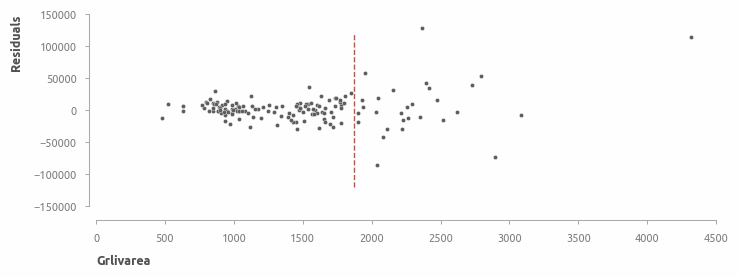

Image 'grlivarea_residuals.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [91]:
fig = plt.figure(figsize=(8, 2.5))
sns.scatterplot(
    data=data_pred_actual.sort_values('grlivarea'),
    x=data_pred_actual['grlivarea'],
    y=data_pred_actual['residual'],
    zorder=10
)
plt.axvline(1875, 0.1, 0.9, lw=1, ls='--', color=palette[1], zorder=9)
plt.xlabel('Grlivarea')
plt.ylabel('Residuals')
# plt.ylim(bottom=-180000, top=180000)
plt.grid(False)
axis_rstyle(
    xticks=[0, 4500, 500],
    yticks=[-150000, 150000, 50000])
plt.show()

savefig('grlivarea_residuals', save_img)

In [92]:
mean_squared_error(
    data_pred_actual.loc[data_pred_actual['grlivarea']<1800, 'actual_log'],
    data_pred_actual.loc[data_pred_actual['grlivarea']<1800, 'predicted_log'],
    squared=False
)

0.08428042038607002

In [93]:
mean_squared_error(
    data_pred_actual.loc[data_pred_actual['grlivarea']>1800, 'actual_log'],
    data_pred_actual.loc[data_pred_actual['grlivarea']>1800, 'predicted_log'],
    squared=False
)

0.13404655640977148

<Axes: >

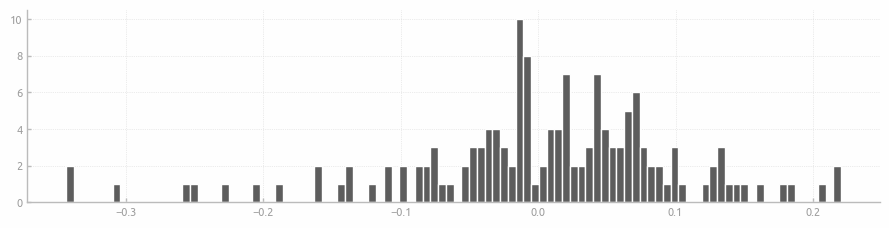

In [94]:
f = plt.figure(figsize=(11, 2.5))
data_pred_actual['residual_frac'].hist(bins=100)

In [95]:
test_normality(data_pred_actual['residual_frac'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),2.0907,Not normal
2,Shapiro-Wilk,0.0000,Not normal
3,Jarque-Bera,0.0000,Not normal
4,D’Agostino-Pearson,0.0000,Not normal


In [96]:
data_resid_frac = data_pred_actual.sort_values('grlivarea').copy()

In [97]:
data_resid_frac.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,yrsold,saletype,salecondition,actual_log,predicted_log,actual,predicted,residual,residual_log,residual_frac
916,917,10,0,50.0,9000,1,2,0,1,1,...,2006,5,1,10.471950,10.767211,35311.0,47440.0,-12129.0,-0.295261,-0.343491
29,30,0,1,60.0,6324,1,2,1,1,1,...,2008,5,4,11.134589,10.976657,68500.0,58493.0,10007.0,0.157932,0.146088
614,615,1,1,21.0,1491,1,2,0,1,1,...,2010,5,4,11.231888,11.245633,75500.0,76545.0,-1045.0,-0.013745,-0.013841
649,650,1,1,21.0,1936,1,2,0,1,1,...,2007,5,4,11.344507,11.258188,84500.0,77512.0,6988.0,0.086318,0.082698
543,544,13,2,34.0,4058,1,2,0,1,1,...,2007,5,4,11.798104,11.740358,133000.0,125537.0,7463.0,0.057747,0.056113


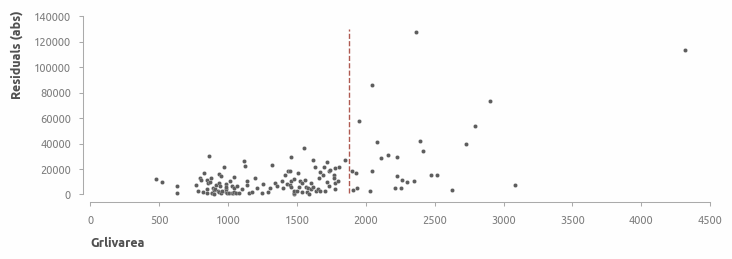

Image 'residuals_grlivarea_scatter.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [98]:
fig, ax = plt.subplots(figsize=(8, 2.5))

plt.scatter(
    x=data_resid_frac['grlivarea'],
    y=data_resid_frac['residual'].abs(),
    **scatter
)

plt.xlabel('Grlivarea')
plt.ylabel('Residuals (abs)')
plt.axvline(1875, 0.05, 0.9, lw=1, ls='--', color=palette[1], zorder=9)
plt.ylim(top=145000)
plt.grid(False)
axis_rstyle(
    offset_left=5,
    offset_bottom=0,
    xticks=[0, 4500, 500],
    yticks=[0, 140000, 20000])
plt.show()

savefig('residuals_grlivarea_scatter', save_img)

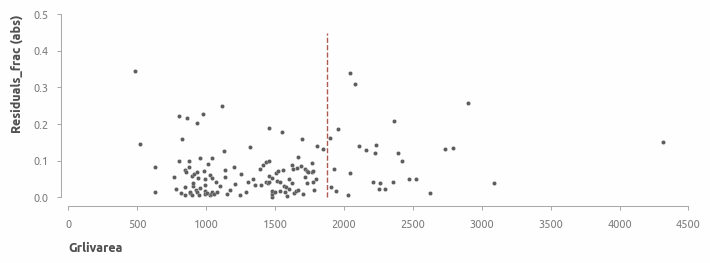

Image 'residuals_grlivarea_scatter_sorted.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [99]:
fig, ax = plt.subplots(figsize=(8, 2.5))

plt.scatter(
    x=data_resid_frac['grlivarea'],
    y=data_resid_frac['residual_frac'].abs(),
    **scatter
)

plt.xlabel('Grlivarea')
plt.ylabel('Residuals_frac (abs)')
plt.axvline(1875, 0.05, 0.9, lw=1, ls='--', color=palette[1], zorder=9)
plt.ylim(bottom=-0.025, top=0.45)
plt.grid(False)
axis_rstyle(
    offset_bottom=0,
    xticks=[0, 4500, 500],
    yticks=[0.0, 0.5, 0.1])
plt.show()

savefig('residuals_grlivarea_scatter_sorted', save_img)

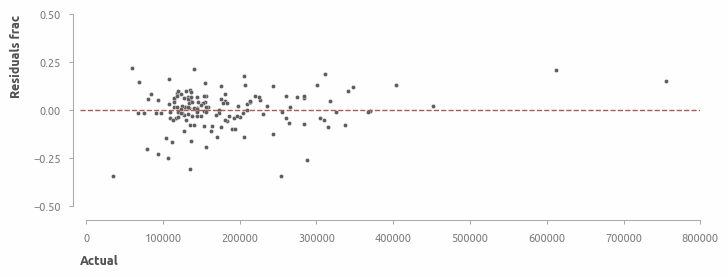

Image 'actual_residual_frac.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [100]:
fig = plt.figure(figsize=(8, 2.5))

sns.scatterplot(
    data=data_pred_actual.sort_values('actual'),
    x=data_pred_actual['actual'],
    y=data_pred_actual['residual_frac']
)
plt.axline([0, 0], [1, 0], lw=1, ls='--', color=palette[1])
plt.xlabel('Actual')
plt.ylabel('Residuals frac')
plt.ylim(-0.5, 0.5)
plt.grid(False)
axis_rstyle(
    offset_left=5,
    xticks=[0, 800000, 100000],
    yticks=[-0.5, 0.5, 0.25])
plt.show()

savefig('actual_residual_frac', save_img)

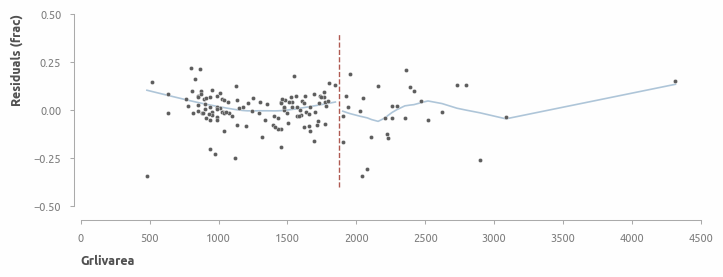

Image 'grlivarea_residuals_frac.png' successfully saved into 'docs/img/Section8-Final-predictions' directory


In [101]:
fig = plt.figure(figsize=(8, 2.5))

sns.scatterplot(
    data=data_pred_actual.sort_values('grlivarea'),
    x=data_pred_actual['grlivarea'],
    y=data_pred_actual['residual_frac'],
    zorder=10
)
sns.regplot(
    x=data_pred_actual[data_pred_actual['grlivarea'] < 1900]['grlivarea'],
    y=data_pred_actual[data_pred_actual['grlivarea'] < 1900]['residual_frac'],
    lowess=True,
    scatter=False,
    line_kws={'lw': 1.2, 'color': palette[2], 'alpha': 0.5},
    label='grlivarea < 1900'
)
sns.regplot(
    x=data_pred_actual[data_pred_actual['grlivarea'] > 1900]['grlivarea'],
    y=data_pred_actual[data_pred_actual['grlivarea'] > 1900]['residual_frac'],
    lowess=True,
    scatter=False,
    line_kws={'lw': 1.2, 'color': palette[2], 'alpha': 0.5},
    label='grlivarea > 1900'
)
plt.axvline(1875, 0.1, 0.9, lw=1, ls='--', color=palette[1])
plt.xlabel('Grlivarea')
plt.ylabel('Residuals (frac)')
plt.ylim(-0.5, 0.5)
plt.grid(False)
axis_rstyle(
    xticks=[0, 4500, 500],
    yticks=[-0.5, 0.5, 0.25]
)
plt.show()
            
savefig('grlivarea_residuals_frac', save_img)

### Save Session

In [102]:
save_session(session_name)

### Execution time

In [103]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:28
